<a href="https://colab.research.google.com/github/vit050587/Natural_Language_Processing/blob/master/KVA_HW_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ДЗ. POS-tagger и NER
Задание 1.

Написать теггер на данных с русским языком
* проверить UnigramTagger, BigramTagger, TrigramTagger и их комбмнации
* написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
* сравнить все реализованные методы сделать выводы

In [1]:
!pip install corus
!pip install pyconll
!pip install razdel
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Uninstalling spacy-3.5.3:
      Successfully uninstalled spacy-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.0 which is incompatible.


In [2]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline

from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import corus
import pandas as pd
import numpy as np

import pyconll

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pre_path = '/content/drive/MyDrive/Colab Notebooks/Natural_Language_Processing/lesson05/'

full_train = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-a.conllu')
full_train_b = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-b.conllu')
full_train_c = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-c.conllu')

full_train.extend([*full_train_b, *full_train_c]) # объединяем

full_test = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-dev.conllu')

In [7]:
fdata_train = []
for sent in full_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])

fdata_test = []
for sent in full_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])

fdata_sent_test = []
for sent in full_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [8]:
comparing_list = []

##Default tagger

In [9]:
%%time

default_tagger = DefaultTagger('NOUN')

# display(default_tagger.tag(fdata_sent_test[100]))
display(default_tagger.evaluate(fdata_test))

comparing_list.append(('default_tagger', default_tagger.evaluate(fdata_test)))

0.23593983983332248

CPU times: user 480 ms, sys: 22.7 ms, total: 503 ms
Wall time: 519 ms


##Unigram Tagger

In [10]:
%%time

unigram_tagger = UnigramTagger(fdata_train)

# display(unigram_tagger.tag(fdata_sent_test[100]))
display(unigram_tagger.evaluate(fdata_test))

comparing_list.append(('unigram_tagger', unigram_tagger.evaluate(fdata_test)))

0.8782863467673677

CPU times: user 4.99 s, sys: 61.7 ms, total: 5.06 s
Wall time: 5.15 s


##Bigram Tagger

In [11]:
%%time

bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)

# display(bigram_tagger.tag(fdata_sent_test[100]))
display(bigram_tagger.evaluate(fdata_test))

comparing_list.append(('bigram_tagger', bigram_tagger.evaluate(fdata_test)))

0.8839768214076438

CPU times: user 5.87 s, sys: 81.3 ms, total: 5.95 s
Wall time: 5.98 s


##Trigram Tagger

In [12]:
%%time

bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)

# display(bigram_tagger.tag(fdata_sent_test[100]))
display(bigram_tagger.evaluate(fdata_test))

comparing_list.append(('bigram_tagger', bigram_tagger.evaluate(fdata_test)))

0.8839768214076438

CPU times: user 7.83 s, sys: 24.3 ms, total: 7.85 s
Wall time: 7.98 s


##Trigram Tagger

In [13]:
%%time

trigram_tagger = TrigramTagger(fdata_train, backoff=bigram_tagger)

# display(trigram_tagger.tag(fdata_sent_test[100]))
display(trigram_tagger.evaluate(fdata_test))

comparing_list.append(('trigram_tagger', trigram_tagger.evaluate(fdata_test)))

0.8830522820496126

CPU times: user 11.5 s, sys: 135 ms, total: 11.7 s
Wall time: 11.7 s


##Taggers combination

In [14]:
from nltk.tag import TrigramTagger

def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff

backoff = DefaultTagger('NOUN')

In [15]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, BigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_B_T', tag.evaluate(fdata_test)))

0.9119799466111075

CPU times: user 20.2 s, sys: 58.3 ms, total: 20.2 s
Wall time: 21.5 s


In [16]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, BigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_B', tag.evaluate(fdata_test)))

0.9118822840028648

CPU times: user 11.9 s, sys: 29.4 ms, total: 11.9 s
Wall time: 12.1 s


In [17]:
%%time

tag = backoff_tagger(fdata_train,
                     [BigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('B_T', tag.evaluate(fdata_test)))

0.8606680122403803

CPU times: user 18.7 s, sys: 64.2 ms, total: 18.8 s
Wall time: 18.9 s


In [18]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_T', tag.evaluate(fdata_test)))

0.9119213490461618

CPU times: user 12.6 s, sys: 37.9 ms, total: 12.7 s
Wall time: 12.8 s


In [19]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        if (tok[0] is None) or (tok[1] is None):
            continue
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])

test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        if (tok[0] is None) or (tok[1] is None):
            continue
        test_tok.append(tok[0])
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [20]:
le = LabelEncoder()
train_enc_labels = le.fit_transform(train_label)

In [21]:
test_enc_labels = le.transform(test_label)

##Count Vectorizer

In [22]:
cvtr = CountVectorizer(ngram_range=(1, 3), analyzer='char')

X_train = cvtr.fit_transform(train_tok)
X_test = cvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('count_vectorizer', accuracy_score(test_enc_labels, pred)))

0.8514267079732594

##Hashing Vectorizer

In [23]:
hvtr = HashingVectorizer(ngram_range=(1, 3), analyzer='char', n_features=100)

X_train = hvtr.fit_transform(train_tok)
X_test = hvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('hashing_vectorizer', accuracy_score(test_enc_labels, pred)))

0.6735626936246535

##Tfidf Vectorizer

In [24]:
tfvtr = TfidfVectorizer(ngram_range=(1, 3), analyzer='char')

X_train = tfvtr.fit_transform(train_tok)
X_test = tfvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('tfidf_vectorizer', accuracy_score(test_enc_labels, pred)))

0.8065416598728192

In [25]:
comparing_list

[('default_tagger', 0.23593983983332248),
 ('unigram_tagger', 0.8782863467673677),
 ('bigram_tagger', 0.8839768214076438),
 ('bigram_tagger', 0.8839768214076438),
 ('trigram_tagger', 0.8830522820496126),
 ('U_B_T', 0.9119799466111075),
 ('U_B', 0.9118822840028648),
 ('B_T', 0.8606680122403803),
 ('U_T', 0.9119213490461618),
 ('count_vectorizer', 0.8514267079732594),
 ('hashing_vectorizer', 0.6735626936246535),
 ('tfidf_vectorizer', 0.8065416598728192)]

In [26]:
pd.DataFrame(comparing_list, columns=['tagger', 'accuracy']).sort_values(by='accuracy', ascending=False)

,tagger,accuracy
5,U_B_T,0.911980
8,U_T,0.911921
6,U_B,0.911882
2,bigram_tagger,0.883977
3,bigram_tagger,0.883977
4,trigram_tagger,0.883052
1,unigram_tagger,0.878286
7,B_T,0.860668
9,count_vectorizer,0.851427
11,tfidf_vectorizer,0.806542


Лучший показатель accuracy получился у комбинированного теггера, векторайзеры справились чуть хуже, ну и самый плохой показатель естественно у default_tagger.

#Задание 2. Проверить насколько хорошо работает NER
данные брать из http://www.labinform.ru/pub/named_entities/

* проверить NER из nltk/spacy/deeppavlov
* написать свой нер попробовать разные подходы
** передаём в сетку токен и его соседей
** передаём в сетку только токен
** свой вариант
* сравнить ваши реализованные подходы на качество (вывести precision/recall/f1_score)

In [27]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

--2023-07-11 14:55:48--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip’

collection5.zip     100%[===================>]   1.81M  1.54MB/s    in 1.2s    

2023-07-11 14:55:50 (1.54 MB/s) - ‘collection5.zip’ saved [1899530/1899530]



In [28]:
!unzip collection5.zip

Archive:  collection5.zip
   creating: Collection5/
  inflating: Collection5/001.ann     
  inflating: Collection5/001.txt     
  inflating: Collection5/002.ann     
  inflating: Collection5/002.txt     
  inflating: Collection5/003.ann     
  inflating: Collection5/003.txt     
  inflating: Collection5/004.ann     
  inflating: Collection5/004.txt     
  inflating: Collection5/005.ann     
  inflating: Collection5/005.txt     
  inflating: Collection5/006.ann     
  inflating: Collection5/006.txt     
  inflating: Collection5/007.ann     
  inflating: Collection5/007.txt     
  inflating: Collection5/008.ann     
  inflating: Collection5/008.txt     
  inflating: Collection5/009.ann     
  inflating: Collection5/009.txt     
  inflating: Collection5/010.ann     
  inflating: Collection5/010.txt     
  inflating: Collection5/011.ann     
  inflating: Collection5/011.txt     
  inflating: Collection5/012.ann     
  inflating: Collection5/012.txt     
  inflating: Collection5/013.ann    

In [29]:
from corus import load_ne5

path_coll5 = '/content/drive/MyDrive/Colab Notebooks/Natural_Language_Processing/lesson05/collection5/'
records = load_ne5(path_coll5)
next(records)

Ne5Markup(
    id='102',
    text='НАТО призналось в убийстве мирных жителей в Афганистане\r\nРуководство возглавляемых НАТО Международных сил содействия безопасности в Афганистане (ISAF) признало факт гибели мирных жителей в операциях на востоке страны, сообщает AFP. Ранее президент Афганистана Хамид Карзай объявил о гибели 26 человек и потребовал расследования этих инцидентов.\r\n\r\nПо словам представителей властей уезда Кхогьяни в провинции Нангархар, в результате столкновения у деревни Накрхайл погибли 12 мирных жителей, а жертвами аналогичного инцидента у населенного пункта Хашимхайл стали 14 человек. Сколько среди них было боевиков и сколько мирных жителей, пока не установлено.\r\n\r\nВ то же время военачальники НАТО утверждают, что последние операции против талибов проводились не в Кхогьяни, а в граничащем с ним уезде Шерзад. Тем не менее, в письменном обращении контр-адмирала Грега Смита говорится, что силы НАТО сожалеют о жертвах среди мирного населения. Также в послании выра

In [30]:
from razdel import tokenize

In [31]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [32]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [33]:
df_words['tag'].value_counts()
df_words.head(3)

,word,tag
0,Командующий,OUT
1,силами,OUT
2,НАТО,ORG


In [34]:
df_words.shape

(265250, 2)

In [35]:
records = load_ne5(path_coll5)
next(records).text
next(records).text
next(records).text
next(records).text
next(records).text
article = next(records).text
article

'Из ВТБ уволился второй топ-менеджер за неделю\r\nЗаместитель председателя правления второго по величине российского банка ВТБ Юлия Чупина покинула свой пост "в связи с обстоятельствами личного характера". Об этом сообщает агентство "Интерфакс".\r\n\r\nЭто уже второй топ-менеджер, который уходит из ВТБ за последнюю неделю. 16 июля ВТБ опубликовал пресс-релиз об уходе из банка по личным причинам заместителя председателя правления Вадима Левина, который занимался наиболее важными клиентами и проектами организации. Газета "Коммерсант" называла Левина одним из самых влиятельных менеджеров ВТБ.\r\n\r\nПресс-служба ВТБ сообщила "Интерфаксу", что Чупина не работает в банке с июля, однако точная дата увольнения не была названа. Как передает РИА Новости со ссылкой на источник, близкий к банку, причиной ухода Чупиной стало желание посвящать больше времени семье.\r\n\r\nОфициальный представитель ВТБ Максим Лунев заявил, что стратегию развития финансовой организации будет курировать старший вице-п

##NLTK

In [36]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('names')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [37]:
words5 = list(df_words.word)

In [38]:
data5_tag = nltk.pos_tag(words5[:50000])

In [39]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(article))) if hasattr(chunk, 'label') }

{('ВТБ', 'ORGANIZATION'),
 ('ВТБ Максим Лунев', 'ORGANIZATION'),
 ('Вадима Левина', 'PERSON'),
 ('Екатерина Петелина', 'PERSON'),
 ('Левина', 'PERSON'),
 ('РИА Новости', 'ORGANIZATION'),
 ('Чупина', 'PERSON'),
 ('Чупиной', 'PERSON')}

NLTK справился ужасно))

##Spacy

In [40]:
!python -m spacy download ru_core_news_sm

2023-07-11 14:56:47.783208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 14:56:49.164661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=065cb7e28e1c465185d9312af44895c2ce9b631f6062ccbbbcc1c26bd4232e8b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built doc

In [41]:
import spacy
from spacy import displacy

In [42]:
nlp = spacy.load("ru_core_news_sm")
spacy_article = nlp(article)
displacy.render(spacy_article, jupyter=True, style='ent')

Spacy неплохо справился

##Deeppaclov

In [43]:
!pip install deeppavlov

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.3/468.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uni

In [44]:
# !python -m deeppavlov install ner_rus_bert_torch

# !python -m venv env
# #.\env\Scripts\activate.bat
# !pip install deeppavlov
# !python -m deeppavlov install squad_bert

#!python -m deeppavlov install ner_ontonotes

In [45]:
# !pip install tensorflow-gpu==1.14.0

In [46]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4394816 sha256=7712325950b719898e934a1728dc62ece2763c6f16bede206bcf138b49ad87df
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [47]:
import deeppavlov
from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner, download=True)
rus_document = "Нью-Йорк, США, 30 апреля 2020, 01:01 — REGNUM В администрации президента США Дональда Трампа планируют пройти все этапы создания вакцины от коронавируса в ускоренном темпе и выпустить 100 млн доз до конца 2020 года, передаёт агентство Bloomberg со ссылкой на осведомлённые источники"
deeppavlov_ner([rus_document])

AttributeError: ignored

##Natasha

In [48]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 45.3 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=dc0ef97ad49524291b9ccadd5503606c405b0bdcaebaa11106bb3ec0ae33de82
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [49]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [50]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(article)

In [51]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(stop=2, text='Из'),
 DocToken(start=3, stop=6, text='ВТБ'),
 DocToken(start=7, stop=15, text='уволился'),
 DocToken(start=16, stop=22, text='второй'),
 DocToken(start=23, stop=35, text='топ-менеджер')]

[DocSent(stop=202, text='Из ВТБ уволился второй топ-менеджер за неделю\r\n..., tokens=[...]),
 DocSent(start=203, stop=242, text='Об этом сообщает агентство "Интерфакс".', tokens=[...]),
 DocSent(start=246, stop=317, text='Это уже второй топ-менеджер, который уходит из ВТ..., tokens=[...]),
 DocSent(start=318, stop=510, text='16 июля ВТБ опубликовал пресс-релиз об уходе из б..., tokens=[...]),
 DocSent(start=511, stop=589, text='Газета "Коммерсант" называла Левина одним из самы..., tokens=[...])]

In [52]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

                  Из ADP
                 ВТБ PROPN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
            уволился VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
              второй ADJ|Case=Nom|Degree=Pos|Gender=Masc|Number=Sing
        топ-менеджер NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                  за ADP
              неделю NOUN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
         Заместитель NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
        председателя NOUN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
           правления NOUN|Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing
             второго ADJ|Case=Gen|Degree=Pos|Gender=Masc|Number=Sing
                  по ADP
            величине NOUN|Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing
         российского ADJ|Case=Gen|Degree=Pos|Gender=Masc|Number=Sing
               банка NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                 ВТБ PROPN|Animacy=Ina

In [53]:
sent.syntax.print()

            ┌► Из               case
          ┌►└─ ВТБ              obl
┌───────┌─└─── уволился         
│       │   ┌► второй           amod
│     ┌─└──►└─ топ-менеджер     nsubj
│     │     ┌► за               case
│     └────►└─ неделю           nmod
│ ┌►┌───────┌─ Заместитель      nsubj
│ │ │     ┌─└► председателя     nmod
│ │ │ ┌───└──► правления        nmod
│ │ │ │ ┌►┌─── второго          amod
│ │ │ │ │ │ ┌► по               case
│ │ │ │ │ └►└─ величине         nmod
│ │ │ │ │   ┌► российского      amod
│ │ │ └►└─┌─└─ банка            nmod
│ │ │     └──► ВТБ              appos
│ │ └──────►┌─ Юлия             appos
│ │         └► Чупина           flat:name
│ └─┌─────┌─── покинула         
│   │     │ ┌► свой             det
│   │     └►└─ пост             obj
│   │ ┌──────► "                punct
│   │ │ ┌►┌─┌─ в                case
│   │ │ │ │ └► связи            fixed
│   │ │ │ └──► с                fixed
│   └►└─└─┌─── обстоятельствами obl
│     │   │ ┌► личного          amod
│

In [54]:
doc.tag_ner(ner_tagger)
doc.ner.print()

Из ВТБ уволился второй топ-менеджер за неделю
   ORG                                       
Заместитель председателя правления второго по величине российского 
банка ВТБ Юлия Чупина покинула свой пост "в связи с обстоятельствами 
      ORG PER────────                                                
личного характера". Об этом сообщает агентство "Интерфакс".
                                                ORG──────  
Это уже второй топ-менеджер, который уходит из ВТБ за последнюю 
                                               ORG              
неделю. 16 июля ВТБ опубликовал пресс-релиз об уходе из банка по 
                ORG                                              
личным причинам заместителя председателя правления Вадима Левина, 
                                                   PER──────────  
который занимался наиболее важными клиентами и проектами организации. 
Газета "Коммерсант" называла Левина одним из самых влиятельных 
        ORG───────           PER───              

#Создадим свой NER

In [55]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [56]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [57]:
train_x.apply(len).max(axis=0)

55

In [58]:
# char level
#train_x = train_x.apply(lambda x: ' '.join(list(x)))
#valid_x = valid_x.apply(lambda x: ' '.join(list(x)))

In [59]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [60]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

##Униграмы

In [61]:
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [62]:
len(vectorize_layer.get_vocabulary())

29844

In [63]:
embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)

        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)

        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob

In [64]:
mmodel = modelNER()

In [65]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [66]:
mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12434/12434 [==============================] - 350s 28ms/step - loss: 0.2957 - accuracy: 0.9135 - val_loss: 0.2100 - val_accuracy: 0.9373
Epoch 2/3
12434/12434 [==============================] - 326s 26ms/step - loss: 0.1256 - accuracy: 0.9625 - val_loss: 0.2532 - val_accuracy: 0.8937
Epoch 3/3
12434/12434 [==============================] - 320s 26ms/step - loss: 0.1094 - accuracy: 0.9655 - val_loss: 0.2444 - val_accuracy: 0.8942


In [67]:
preds = mmodel.predict(valid_x)
preds = np.argmax(preds,axis=1)

2073/2073 [==============================] - 4s 2ms/step


In [68]:
print(classification_report(valid_y, preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1088
           1       0.89      0.76      0.82      1184
           2       0.93      0.79      0.85       641
           3       0.85      0.59      0.70      3398
           4       0.97      0.92      0.94     54672
           5       0.50      0.88      0.64      5330

    accuracy                           0.89     66313
   macro avg       0.84      0.81      0.81     66313
weighted avg       0.92      0.89      0.90     66313



In [69]:
classes = encoder.classes_
classes

array(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'], dtype=object)

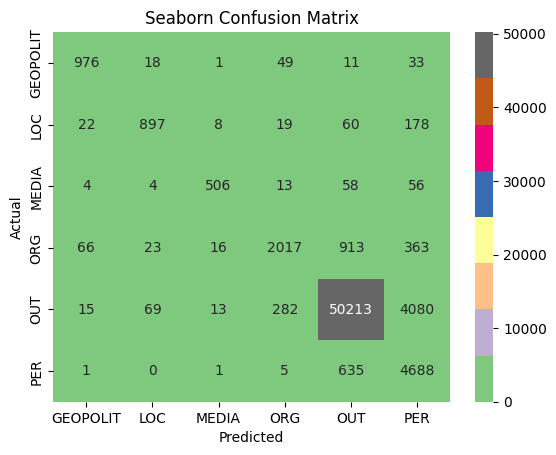

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(valid_y, preds)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

##Изменим векторайзер, добавив биграмы

In [71]:
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 2),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel_bi = modelNER()
mmodel_bi.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mmodel_bi.fit( train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12434/12434 [==============================] - 366s 29ms/step - loss: 0.2939 - accuracy: 0.9139 - val_loss: 0.2086 - val_accuracy: 0.9368
Epoch 2/3
12434/12434 [==============================] - 464s 37ms/step - loss: 0.1240 - accuracy: 0.9631 - val_loss: 0.4042 - val_accuracy: 0.8938
Epoch 3/3
12434/12434 [==============================] - 486s 39ms/step - loss: 0.1094 - accuracy: 0.9655 - val_loss: 0.3533 - val_accuracy: 0.8943


2073/2073 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1088
           1       0.89      0.75      0.81      1184
           2       0.93      0.78      0.85       641
           3       0.86      0.59      0.70      3398
           4       0.97      0.92      0.94     54672
           5       0.50      0.88      0.64      5330

    accuracy                           0.89     66313
   macro avg       0.84      0.80      0.81     66313
weighted avg       0.92      0.89      0.90     66313



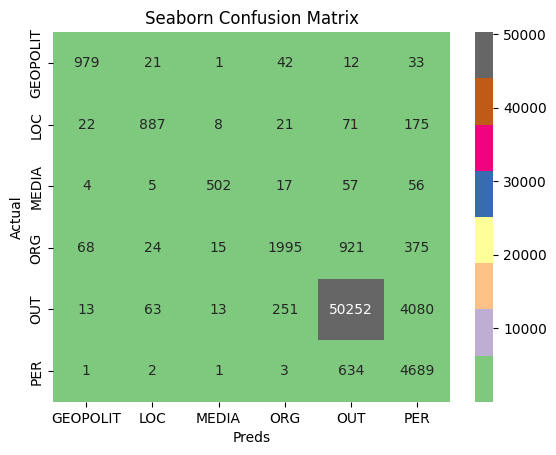

In [72]:
preds_bi = mmodel_bi.predict(valid_x)
preds_bi = np.argmax(preds_bi,axis=1)

print(classification_report(valid_y, preds_bi))

cm = confusion_matrix(valid_y, preds_bi)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Preds')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

##Изменим векторайзер, добавив биграмы и триграмы, и длину последовательности 100.

In [73]:
seq_len = 100

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel_three = modelNER()
mmodel_three.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mmodel_three.fit( train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12434/12434 [==============================] - 540s 43ms/step - loss: 0.2937 - accuracy: 0.9147 - val_loss: 0.2110 - val_accuracy: 0.9366
Epoch 2/3
12434/12434 [==============================] - 599s 48ms/step - loss: 0.1245 - accuracy: 0.9628 - val_loss: 0.2338 - val_accuracy: 0.8939
Epoch 3/3
12434/12434 [==============================] - 581s 47ms/step - loss: 0.1091 - accuracy: 0.9654 - val_loss: 0.2471 - val_accuracy: 0.8851


2073/2073 [==============================] - 11s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1088
           1       0.88      0.77      0.82      1184
           2       0.93      0.77      0.84       641
           3       0.30      0.70      0.42      3398
           4       0.97      0.92      0.94     54672
           5       0.97      0.70      0.82      5330

    accuracy                           0.89     66313
   macro avg       0.83      0.79      0.79     66313
weighted avg       0.93      0.89      0.90     66313



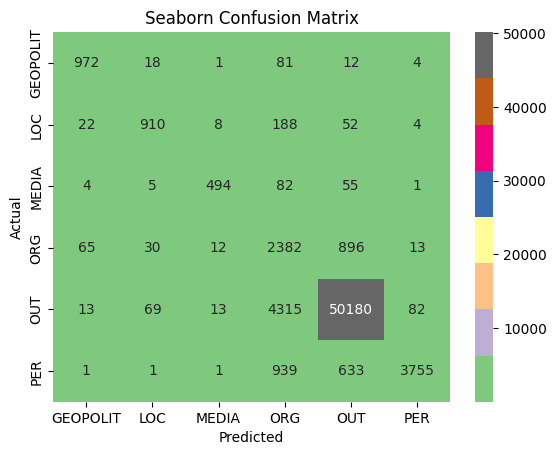

In [74]:
preds_three = mmodel_three.predict(valid_x)
preds_three = np.argmax(preds_three,axis=1)

print(classification_report(valid_y, preds_three))

cm = confusion_matrix(valid_y, preds_three)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

Самописная NER в принципе неплохо справляется. Есть небольшое улучшение, когда даем сетке токен и соседей, по сравнению с тем, когда даем сетке только токен.